In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


df = pd.read_csv(r'C:\Users\bhavyata\Documents\SOFTWARE PROJECT\carbonfootprint-software project\datasets\individual.csv')

pd.set_option('display.max_columns', None)

df.columns = df.columns.str.replace(' ', '_')

df['Vehicle_Type'] = df['Vehicle_Type'].replace({'public': 'public transport', 'petrol': 'car (type: petrol)','diesel': 'car (type: diesel)',
                                                'hybrid': 'car (type: hybrid)','lpg': 'car (type: lpg)','electric': 'car (type: electric)'})
df['Transport'] = df['Transport'].replace({'public': 'public transport', 'private': 'car'})


df.head()

,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public transport,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,car,car (type: petrol),never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,car,car (type: diesel),often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


# **sorting the variables into groups**


| variable type | explantion variable type | variables in this example | scaling & encoding |
| ----------- | ----------- | ----------- | ----------- |
|dependent variable |   | CarbonEmission |   |
|Quantitative Variables |    | Monthly Grocery Bill, Vehicle Monthly Distance Km, Waste Bag Weekly Count, How Long TV, PC Daily, Hour How Many New Clothes Monthly, How Long Internet Daily Hour | MinMaxScaler |
| Ordinal Variables | Ordinal Variables means there is ordering in the values. for exmaple the values of waste-bag-size are ordered: 'small' < 'medium' < 'large' < 'extra large' | Body_Type, Diet, How_Often_Shower, Social_Activity, Frequency_of_Traveling_by_Air, Waste_Bag_Size, Energy_efficiency | depending on the model: OrdinalEncoder or OneHotEncoder with drop first column(*) |
| Nominal Variables, with one answer | Nominal variables are types of data where the values have no specific order or ranking | 'Sex', 'Heating_Energy_Source'. For 'Transport', 'Vehicle Type' we will combine the information of these two columns into one new column 'Transport_Vehicle_Type' | OneHotEncoder. with drop first column |
| Nominal Variables, with multiple (or zero) answers | Nominal variables are types of data where the values have no specific order or ranking | Recycling, Cooking_With | make dummy-variables and don't drop first column  |

(*)  we will do now OneHotEncoding for the ordinal variables. However for decision trees and random forests, I  expect OrdinalEncoder would work better then OneHotEncoder. If I would do OrdinalEncoder i would also have to do MinMaxScaler so that the vales are between 0 and 1.


In [3]:

variables_transport_vehicle_type=["Transport","Vehicle_Type"] 





variables_ordinal = ['Body_Type','Diet','How_Often_Shower','Social_Activity','Frequency_of_Traveling_by_Air','Waste_Bag_Size','Energy_efficiency']
variables_nominal_1answer = ['Sex', 'Heating_Energy_Source','Transport_Vehicle_Type']
variables_for_one_hot_encoded = variables_ordinal + variables_nominal_1answer 
#variables_for_one_hot_encoded =df.select_dtypes(include=['object','category']).drop(['Transport','Vehicle_Type','Recycling','Cooking_With'],axis=1).columns.tolist()
#variables_for_one_hot_encoded =list(set(df.select_dtypes(include=['object','category']).columns.tolist()) - {'Transport','Vehicle Type','Recycling','Cooking_With'})


#variables_quantitative =df.select_dtypes(include=[np.number]).drop('CarbonEmission',axis=1).columns.tolist()
#variables_quantitative = ["Monthly Grocery Bill", "Vehicle Monthly Distance Km","Waste Bag Weekly Count", "How Long TV PC Daily Hour","How Many New Clothes Monthly", "How Long Internet Daily Hour"]
variables_quantitative = ['Monthly_Grocery_Bill', 'Vehicle_Monthly_Distance_Km', 'Waste_Bag_Weekly_Count', 'How_Long_TV_PC_Daily_Hour', 'How_Many_New_Clothes_Monthly', 'How_Long_Internet_Daily_Hour']



print(len(variables_quantitative),"Features for Min-Max-Scalering:\n",variables_quantitative)
print(len(variables_ordinal)+ len(variables_nominal_1answer),"Features for One-Hot-Encoding:\n",variables_ordinal ,"\n", variables_nominal_1answer )


6 Features for Min-Max-Scalering:
 ['Monthly_Grocery_Bill', 'Vehicle_Monthly_Distance_Km', 'Waste_Bag_Weekly_Count', 'How_Long_TV_PC_Daily_Hour', 'How_Many_New_Clothes_Monthly', 'How_Long_Internet_Daily_Hour']
10 Features for One-Hot-Encoding:
 ['Body_Type', 'Diet', 'How_Often_Shower', 'Social_Activity', 'Frequency_of_Traveling_by_Air', 'Waste_Bag_Size', 'Energy_efficiency'] 
 ['Sex', 'Heating_Energy_Source', 'Transport_Vehicle_Type']


**Take care of categorical data: ordering values of ordinal variables**

In [4]:

dict_variables_ordinal_categorical = {
    'Body_Type': ['underweight', 'normal', 'overweight', 'obese'],
    'Diet': ['vegan','vegetarian','pescatarian','omnivore'],
    'How_Often_Shower': ['less frequently','daily', 'twice a day','more frequently'],
    'Social_Activity': ['never', 'sometimes','often'],
    'Frequency_of_Traveling_by_Air': ['never', 'rarely', 'frequently', 'very frequently'],
    'Waste_Bag_Size': ['small','medium', 'large', 'extra large'],
    'Energy_efficiency': ['Yes', 'Sometimes', 'No']
}

for column, col_ordering in dict_variables_ordinal_categorical.items():
    df[column] = pd.Categorical(df[column], categories=col_ordering, ordered=True)   

df['Waste_Bag_Size'].unique()

['large', 'extra large', 'small', 'medium']
Categories (4, object): ['small' < 'medium' < 'large' < 'extra large']

In [6]:

def max_value(column):     
    if pd.api.types.is_numeric_dtype(column):  
        return column.dropna().max() if not column.dropna().empty else np.nan
    return ""

def get_unique_values(column):       
    if pd.api.types.is_integer_dtype(column):  
        unique_vals = sorted(set(column.dropna()))
        min_val, max_val = column.min(), column.max()
        if unique_vals == list(range(min_val, max_val + 1)):
            return f"range({min_val},{max_val + 1})"
        return unique_vals
#        return f"between {min_val} and {max_val}"
    return sorted(set(column.dropna()))


summary_df = pd.DataFrame({
    'data type': df.dtypes,                                                   
    'missing data': df.isna().sum(),                                           
    'unique values': [get_unique_values(df[col]) for col in df.columns],        
#   'unique values': [sorted(df[col].dropna().unique()) for col in df.columns], 
    'max value': [max_value(df[col]) for col in df.columns],
    'number of unique values': df.nunique()                                     
})


summary_df['data type'] = summary_df['data type'].astype(str)  
summary_df = summary_df.sort_values(by=['data type', 'number of unique values'])

summary_df

,data type,missing data,unique values,max value,number of unique values
Social_Activity,category,0,"[never, often, sometimes]",,3
Energy_efficiency,category,0,"[No, Sometimes, Yes]",,3
Body_Type,category,0,"[normal, obese, overweight, underweight]",,4
Diet,category,0,"[omnivore, pescatarian, vegan, vegetarian]",,4
How_Often_Shower,category,0,"[daily, less frequently, more frequently, twic...",,4
Frequency_of_Traveling_by_Air,category,0,"[frequently, never, rarely, very frequently]",,4
Waste_Bag_Size,category,0,"[extra large, large, medium, small]",,4
Waste_Bag_Weekly_Count,int64,0,"range(1,8)",7,7
How_Long_TV_PC_Daily_Hour,int64,0,"range(0,25)",24,25
How_Long_Internet_Daily_Hour,int64,0,"range(0,25)",24,25


In [5]:

data = []

for headline in ["Recycling" ,"Cooking_With"]:  
    unique_values= set([item for sublist in df[headline].unique() for item in eval(sublist)]) #eval - Convert string representation of list to an actual list
    
    row = {
        'column': headline, 
        'unique values': unique_values, 
        'number of unique values': len(unique_values)
    }
    data.append(row)

pd.DataFrame(data)

,column,unique values,number of unique values
0,Recycling,"{Paper, Plastic, Glass, Metal}",4
1,Cooking_With,"{Microwave, Grill, Stove, Oven, Airfryer}",5


# Correlation between transport-related variables


In [6]:
# Make copy to avoid changing original data 
df_corr=df[['CarbonEmission','Vehicle_Monthly_Distance_Km','Transport','Vehicle_Type']].copy()


for item in df_corr['Transport'].unique():
    df_corr[str(item)] = df_corr['Transport'].apply(lambda x: 1 if item == x else 0)
unique_vehicle_types = list(pd.Series(df_corr['Vehicle_Type'].unique()).dropna().unique()) 
for item in unique_vehicle_types:
    df_corr[str(item)] = df_corr['Vehicle_Type'].apply(lambda x: 1 if item == x else 0)

df_corr

,CarbonEmission,Vehicle_Monthly_Distance_Km,Transport,Vehicle_Type,public transport,walk/bicycle,car,car (type: petrol),car (type: diesel),car (type: hybrid),car (type: lpg),car (type: electric)
0,2238,210,public transport,NaN,1,0,0,0,0,0,0,0
1,1892,9,walk/bicycle,NaN,0,1,0,0,0,0,0,0
2,2595,2472,car,car (type: petrol),0,0,1,1,0,0,0,0
3,1074,74,walk/bicycle,NaN,0,1,0,0,0,0,0,0
4,4743,8457,car,car (type: diesel),0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2408,268,car,car (type: hybrid),0,0,1,0,0,1,0,0
9996,3084,5316,car,car (type: lpg),0,0,1,0,0,0,1,0
9997,2377,96,walk/bicycle,NaN,0,1,0,0,0,0,0,0
9998,4574,8688,car,car (type: petrol),0,0,1,1,0,0,0,0


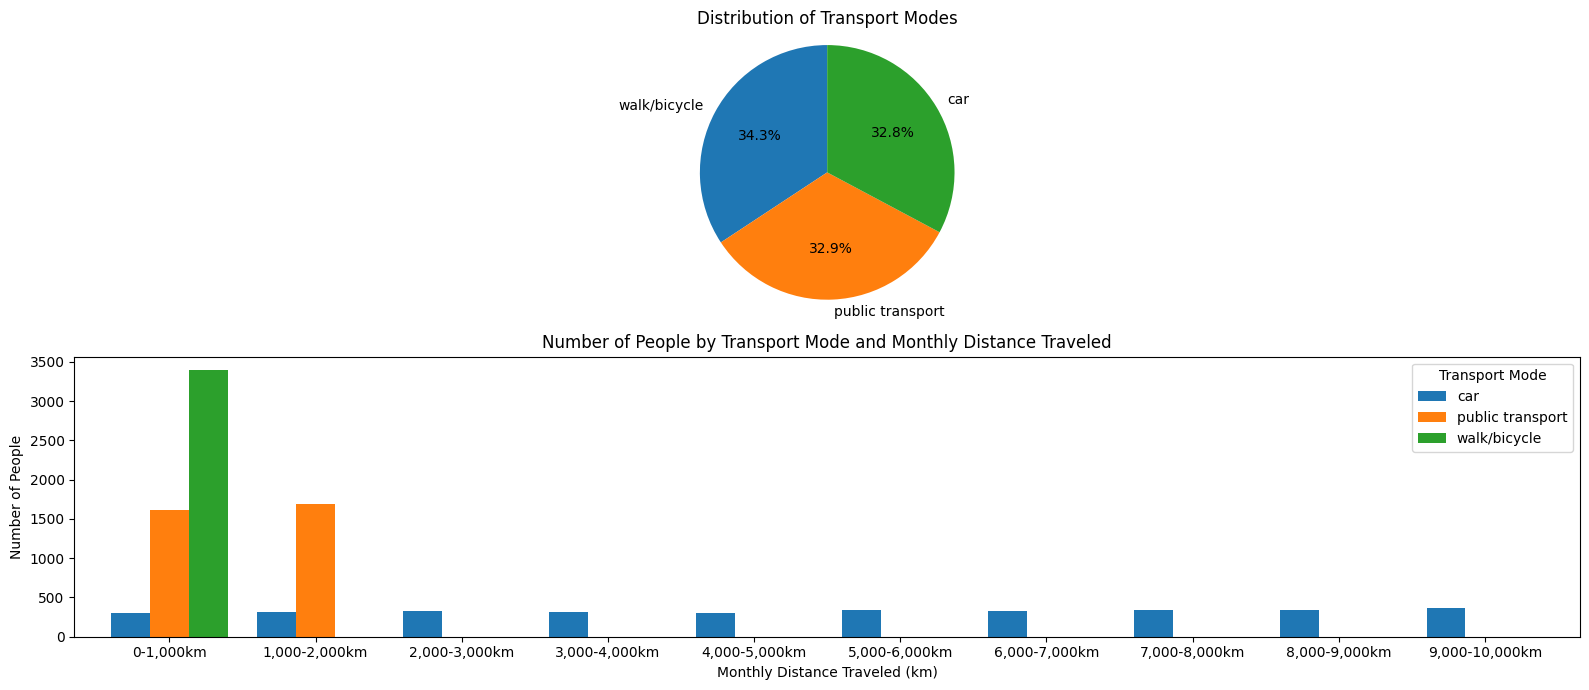

In [7]:



import pandas as pd
import matplotlib.pyplot as plt

# Distribution of transport modes
transport_counts = df_corr['Transport'].value_counts()
labels = [label for label in transport_counts.index]
sizes = transport_counts.values


bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
distance_labels = ["0-1,000km", "1,000-2,000km", "2,000-3,000km", "3,000-4,000km", "4,000-5,000km", 
                   "5,000-6,000km", "6,000-7,000km", "7,000-8,000km", "8,000-9,000km", "9,000-10,000km"]
df_corr['Distance_Category'] = pd.cut(df_corr['Vehicle_Monthly_Distance_Km'], bins=bins, labels=distance_labels)


counts = df_corr.groupby(['Distance_Category', 'Transport'], observed=True).size().unstack(fill_value=0)


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 7))


# Pie chart
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title("Distribution of Transport Modes")

# Bar plot
counts.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Number of People by Transport Mode and Monthly Distance Traveled')
axes[1].set_xlabel('Monthly Distance Traveled (km)')
axes[1].set_ylabel('Number of People')
axes[1].legend(title='Transport Mode')
plt.xticks(rotation=0)



plt.tight_layout()
plt.show()


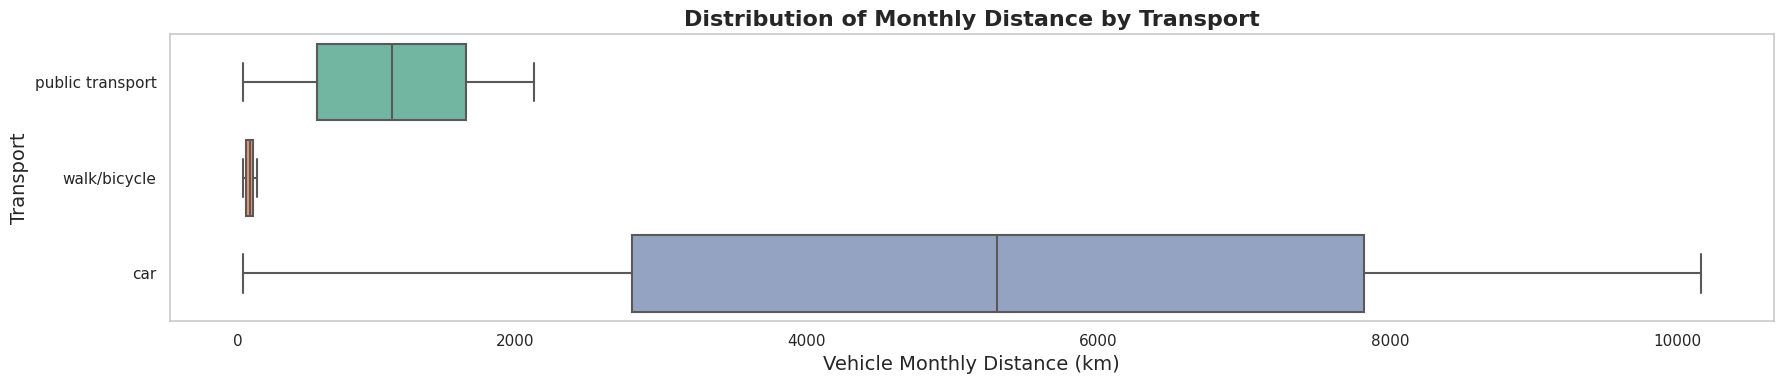

In [8]:



import matplotlib.pyplot as plt
import seaborn as sns

# boxplot
plt.figure(figsize=(18, 4))  
sns.set(style="whitegrid")  


ax = sns.boxplot(y='Transport', x='Vehicle_Monthly_Distance_Km', data=df_corr, palette="Set2")


plt.title('Distribution of Monthly Distance by Transport', fontsize=16, weight='bold')
plt.xlabel('Vehicle Monthly Distance (km)', fontsize=14)
plt.ylabel('Transport', fontsize=14)


ax.grid(False)


plt.xticks(rotation=0, ha='right')


plt.tight_layout()


plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


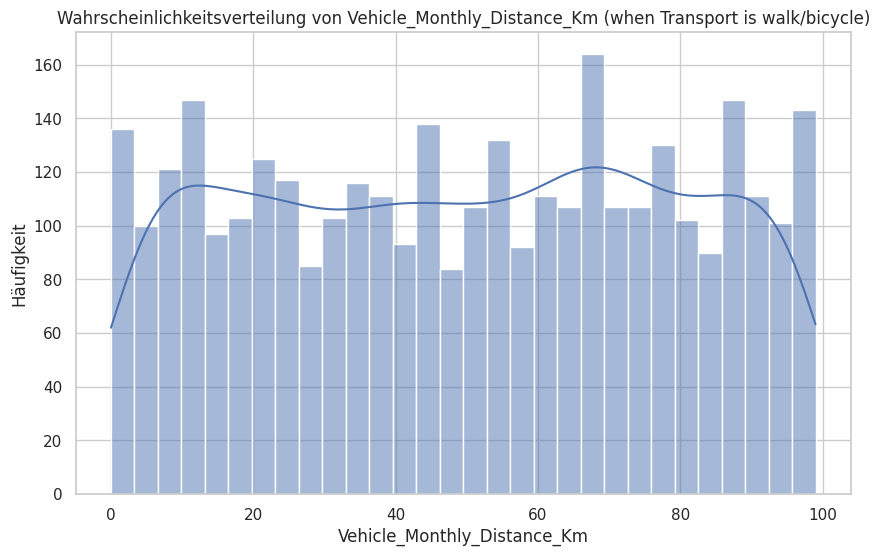

count    3427.000000
mean       49.770937
std        29.142378
min         0.000000
25%        24.000000
50%        50.000000
75%        75.000000
max        99.000000
Name: Vehicle_Monthly_Distance_Km, dtype: float64

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = df_corr[df_corr['Transport'] == 'walk/bicycle']

description = filtered_data['Vehicle_Monthly_Distance_Km'].describe()

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Vehicle_Monthly_Distance_Km'], kde=True, bins=30)
plt.title('Wahrscheinlichkeitsverteilung von Vehicle_Monthly_Distance_Km (when Transport is walk/bicycle)')
plt.xlabel('Vehicle_Monthly_Distance_Km')
plt.ylabel('Häufigkeit')
plt.show()

description

In [10]:

import pandas as pd

filtered_data = df_corr[df_corr['Transport'] == 'walk/bicycle']
filtered_data = filtered_data.dropna(subset=['Vehicle_Monthly_Distance_Km'])

distance_counts = filtered_data['Vehicle_Monthly_Distance_Km'].value_counts().reset_index()
distance_counts.columns = ['Vehicle_Monthly_Distance_Km', 'Count (when Transport is walk/bicycle)']

distance_counts

,Vehicle_Monthly_Distance_Km,Count (when Transport is walk/bicycle)
0,92,55
1,7,51
2,69,50
3,24,48
4,98,47
...,...,...
95,55,24
96,84,24
97,36,23
98,23,23


In [11]:

import pandas as pd

filtered_data = df_corr[df_corr['Transport'] == 'public transport']
filtered_data = filtered_data.dropna(subset=['Vehicle_Monthly_Distance_Km'])

distance_counts = filtered_data['Vehicle_Monthly_Distance_Km'].value_counts().reset_index()
distance_counts.columns = ['Vehicle_Monthly_Distance_Km', 'Count (when Transport is walk/bicycle)']

distance_counts

,Vehicle_Monthly_Distance_Km,Count (when Transport is walk/bicycle)
0,1507,7
1,1046,7
2,520,6
3,1159,6
4,1886,6
...,...,...
1585,1496,1
1586,785,1
1587,991,1
1588,1771,1


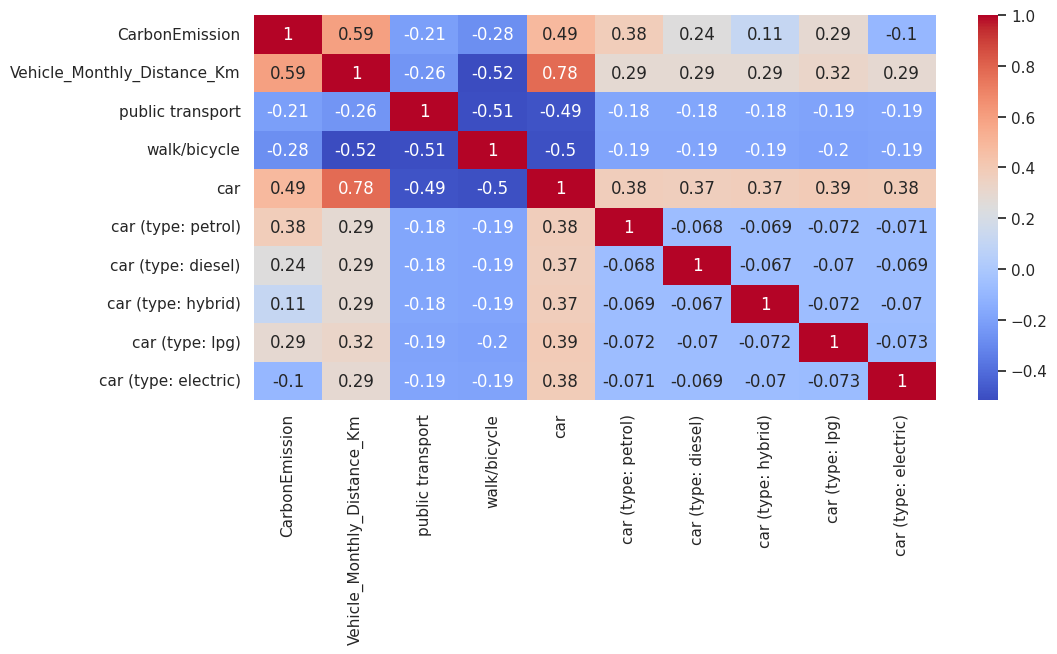

In [12]:
#correlation metric
import matplotlib.pyplot as plt

#correlations = df[column_for_correlation].corr()
correlations = df_corr[['CarbonEmission', 'Vehicle_Monthly_Distance_Km', 'public transport', 'walk/bicycle', 'car',
       'car (type: petrol)', 'car (type: diesel)', 'car (type: hybrid)',
       'car (type: lpg)', 'car (type: electric)']].corr()
plt.figure(figsize=(11, 5))  #size of figure
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [13]:

df.isna().sum()

Body_Type                           0
Sex                                 0
Diet                                0
How_Often_Shower                    0
Heating_Energy_Source               0
Transport                           0
Vehicle_Type                     6721
Social_Activity                     0
Monthly_Grocery_Bill                0
Frequency_of_Traveling_by_Air       0
Vehicle_Monthly_Distance_Km         0
Waste_Bag_Size                      0
Waste_Bag_Weekly_Count              0
How_Long_TV_PC_Daily_Hour           0
How_Many_New_Clothes_Monthly        0
How_Long_Internet_Daily_Hour        0
Energy_efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

In [14]:
##test

#test: if "Transport"=="public transport" then "Vehicle Type"==NaN
assert df[df["Transport"]=="public"]["Vehicle_Type"].isna().all()  

#test: if "walk/bicycle" then "Vehicle Type"==NaN
assert df[df["Transport"]=="walk/bicycle"]["Vehicle_Type"].isna().all()  
#test: if "Transport"=="private" then "Vehicle Type"!=NaN
assert not ((df["Transport"]=="private") & (df["Vehicle_Type"].isna())).any() 

In [15]:
##create new column "Transport Vehicle Type" 
df["Transport_Vehicle_Type"]=df["Vehicle_Type"] #create a new column
df.loc[df["Transport_Vehicle_Type"].isna(), "Transport_Vehicle_Type"] = df["Transport"] 


##add "Transport Vehicle Type" to one-hot-encoding-list
if "Transport_Vehicle_Type" not in variables_for_one_hot_encoded: 
    variables_for_one_hot_encoded.append("Transport_Vehicle_Type") 

df[["Transport","Vehicle_Type","Transport_Vehicle_Type"]].head()

,Transport,Vehicle_Type,Transport_Vehicle_Type
0,public transport,NaN,public transport
1,walk/bicycle,NaN,walk/bicycle
2,car,car (type: petrol),car (type: petrol)
3,walk/bicycle,NaN,walk/bicycle
4,car,car (type: diesel),car (type: diesel)


In [16]:

print(df.groupby(["Transport","Vehicle_Type","Transport_Vehicle_Type"]).size()) 

pd.DataFrame(df.groupby(["Transport","Transport_Vehicle_Type"]).size())

Transport  Vehicle_Type          Transport_Vehicle_Type
car        car (type: diesel)    car (type: diesel)        622
           car (type: electric)  car (type: electric)      671
           car (type: hybrid)    car (type: hybrid)        642
           car (type: lpg)       car (type: lpg)           697
           car (type: petrol)    car (type: petrol)        647
dtype: int64


0
Transport        Transport_Vehicle_Type      
car              car (type: diesel)       622
                 car (type: electric)     671
                 car (type: hybrid)       642
                 car (type: lpg)          697
                 car (type: petrol)       647
public transport public transport        3294
walk/bicycle     walk/bicycle            3427

In [17]:
##create new column: dummy-variables for Recycling
unique_values_Recycling= set([item for sublist in df['Recycling'].unique() for item in eval(sublist)]) 
for item in unique_values_Recycling:
    df['Recycling_'+str(item)] = df['Recycling'].apply(lambda x: 1 if item in x else 0)

##create new column: dummy-variables for Cooking-with
unique_values_cooking_With= set([item for sublist in df['Cooking_With'].unique() for item in eval(sublist)]) 
for item in unique_values_cooking_With:
    df['Cooking_With_'+str(item)] = df['Cooking_With'].apply(lambda x: 1 if item in x else 0)



variables_mit_mehreren_antwortmoeglichkeiten=[]
columns_recycling=['Recycling_'+str(item) for item in unique_values_Recycling] 
if columns_recycling[0] not in variables_mit_mehreren_antwortmoeglichkeiten: 
    variables_mit_mehreren_antwortmoeglichkeiten += columns_recycling
columns_cooking_with=['Cooking_With_'+str(item) for item in unique_values_cooking_With] 
if columns_cooking_with[0] not in variables_mit_mehreren_antwortmoeglichkeiten:
    variables_mit_mehreren_antwortmoeglichkeiten += columns_cooking_with

print("Features where we already have dummy-variables:\n",variables_mit_mehreren_antwortmoeglichkeiten)


df.iloc[282:284, -13:] 

Features where we already have dummy-variables:
 ['Recycling_Paper', 'Recycling_Plastic', 'Recycling_Glass', 'Recycling_Metal', 'Cooking_With_Microwave', 'Cooking_With_Grill', 'Cooking_With_Stove', 'Cooking_With_Oven', 'Cooking_With_Airfryer']


,Recycling,Cooking_With,CarbonEmission,Transport_Vehicle_Type,Recycling_Paper,Recycling_Plastic,Recycling_Glass,Recycling_Metal,Cooking_With_Microwave,Cooking_With_Grill,Cooking_With_Stove,Cooking_With_Oven,Cooking_With_Airfryer
282,"['Paper', 'Plastic', 'Metal']",[],1484,public transport,1,1,0,1,0,0,0,0,0
283,[],"['Stove', 'Grill', 'Airfryer']",2955,public transport,0,0,0,0,0,1,1,0,1


# data-cleaning

In [18]:

#what are the values for the variables "Cooking With Airfryer","Cooking With Grill"
print(df.groupby(["Cooking_With_Airfryer","Cooking_With_Grill"]).size())


df[["Cooking_With_Grill", "Cooking_With_Airfryer"]].corr()

#therefore we delete "Cooking_With_Airfryer" in the code
try:
    variables_mit_mehreren_antwortmoeglichkeiten.remove("Cooking_With_Airfryer")
except:
    print('Cooking_With_Airfryer ist ist nicht in Liste')

Cooking_With_Airfryer  Cooking_With_Grill
0                      0                     5008
1                      1                     4992
dtype: int64


# **Encoding & Scaling**

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler


X = df[variables_quantitative + variables_for_one_hot_encoded + variables_mit_mehreren_antwortmoeglichkeiten]  

print(len(variables_for_one_hot_encoded),"Features for One-Hot-Encoding:\n",variables_for_one_hot_encoded)
print(len(variables_quantitative),"Features for Min-Max-Scalering:\n",variables_quantitative)
print(len(variables_mit_mehreren_antwortmoeglichkeiten),"Features where we already have dummy-variables:\n",variables_mit_mehreren_antwortmoeglichkeiten)



cf = ColumnTransformer(
    [(col, OneHotEncoder(drop="first"), [col]) for col in variables_for_one_hot_encoded] +
    [(col, MinMaxScaler(), [col]) for col in variables_quantitative],  
    remainder="passthrough")

#old code # Create the ColumnTransformer using the list "variables_for_one_hot_encoded"
#cf = ColumnTransformer(
#    [(col, OneHotEncoder(drop="first"), [col]) for col in variables_for_one_hot_encoded],  
#    remainder="passthrough")

cf.fit(X)
X_transformed = cf.transform(X) # Data after scaling


#old code

# scaling so number are between 0 and 1

#scaler = MinMaxScaler()

#scaler.fit(X_transformed)
#X_transformed_scaled = scaler.transform(X_transformed)  # Data after scaling



cf 




10 Features for One-Hot-Encoding:
 ['Body_Type', 'Diet', 'How_Often_Shower', 'Social_Activity', 'Frequency_of_Traveling_by_Air', 'Waste_Bag_Size', 'Energy_efficiency', 'Sex', 'Heating_Energy_Source', 'Transport_Vehicle_Type']
6 Features for Min-Max-Scalering:
 ['Monthly_Grocery_Bill', 'Vehicle_Monthly_Distance_Km', 'Waste_Bag_Weekly_Count', 'How_Long_TV_PC_Daily_Hour', 'How_Many_New_Clothes_Monthly', 'How_Long_Internet_Daily_Hour']
8 Features where we already have dummy-variables:
 ['Recycling_Paper', 'Recycling_Plastic', 'Recycling_Glass', 'Recycling_Metal', 'Cooking_With_Microwave', 'Cooking_With_Grill', 'Cooking_With_Stove', 'Cooking_With_Oven']


ColumnTransformer(remainder='passthrough',
                  transformers=[('Body_Type', OneHotEncoder(drop='first'),
                                 ['Body_Type']),
                                ('Diet', OneHotEncoder(drop='first'), ['Diet']),
                                ('How_Often_Shower',
                                 OneHotEncoder(drop='first'),
                                 ['How_Often_Shower']),
                                ('Social_Activity', OneHotEncoder(drop='first'),
                                 ['Social_Activity']),
                                ('Frequency_of_Traveling_by_Air',
                                 OneHotEncoder(drop='f...
                                ('Vehicle_Monthly_Distance_Km', MinMaxScaler(),
                                 ['Vehicle_Monthly_Distance_Km']),
                                ('Waste_Bag_Weekly_Count', MinMaxScaler(),
                                 ['Waste_Bag_Weekly_Count']),
                                ('How_Long_TV_PC_Daily_Hour', MinMaxScaler(),
                                 ['How_Long_TV_PC_Daily_Hour']),
                                ('How_Many_New_Clothes_Monthly', MinMaxScaler(),
                                 ['How_Many_New_Clothes_Monthly']),
                                ('How_Long_Internet_Daily_Hour', MinMaxScaler(),
                                 ['How_Long_Internet_Daily_Hour'])])

In [20]:

X_transformed[0:2]
pd.DataFrame(X_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.722892,0.021002,0.500000,0.291667,0.52,0.041667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.257028,0.000900,0.333333,0.375000,0.76,0.208333,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.353414,0.247225,0.000000,0.583333,0.94,0.250000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.429719,0.007401,0.333333,0.833333,0.10,0.291667,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.867470,0.845785,0.000000,0.125000,0.10,0.250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:

X.head()

,Monthly_Grocery_Bill,Vehicle_Monthly_Distance_Km,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Body_Type,Diet,How_Often_Shower,Social_Activity,Frequency_of_Traveling_by_Air,Waste_Bag_Size,Energy_efficiency,Sex,Heating_Energy_Source,Transport_Vehicle_Type,Recycling_Paper,Recycling_Plastic,Recycling_Glass,Recycling_Metal,Cooking_With_Microwave,Cooking_With_Grill,Cooking_With_Stove,Cooking_With_Oven
0,230,210,4,7,26,1,overweight,pescatarian,daily,often,frequently,large,No,female,coal,public transport,0,0,0,1,0,0,1,1
1,114,9,3,9,38,5,obese,vegetarian,less frequently,often,rarely,extra large,No,female,natural gas,walk/bicycle,0,0,0,1,1,0,1,0
2,138,2472,1,14,47,6,overweight,omnivore,more frequently,never,never,small,Sometimes,male,wood,car (type: petrol),0,0,0,1,1,0,0,1
3,157,74,3,20,5,7,overweight,omnivore,twice a day,sometimes,rarely,medium,Sometimes,male,wood,walk/bicycle,1,1,1,1,1,1,0,0
4,266,8457,1,3,5,6,obese,vegetarian,daily,often,very frequently,large,Yes,female,coal,car (type: diesel),1,0,0,0,0,0,0,1


In [22]:
#old way to do it
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

#X = df[variables_quantitative + variables_for_one_hot_encoded]  

# Create the ColumnTransformer using the list "variables_for_one_hot_encoded"
#cf = ColumnTransformer(
#    [(col, OneHotEncoder(drop="first"), [col]) for col in variables_for_one_hot_encoded],  
#    remainder="passthrough")   


#cf.fit(X)
#X_transformed = cf.transform(X)
#X.head()
#X_transformed[0:2]

In [23]:

pd.DataFrame(X_transformed).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000
mean,0.250000,0.248700,0.254000,0.255400,0.249700,0.245700,0.248700,0.245100,0.251600,0.331900,0.327500,0.245900,0.247700,0.254000,0.250100,0.247400,0.252500,0.346300,0.331600,0.499300,0.255200,0.246200,0.246300,0.067100,0.064200,0.069700,0.064700,0.329400,0.342700,0.497491,0.203169,0.504100,0.505800,0.502180,0.495379,0.49770,0.499700,0.497900,0.504700,0.507300,0.499200,0.504100,0.505
std,0.433034,0.432281,0.435319,0.436108,0.432861,0.430523,0.432281,0.430168,0.433954,0.470919,0.469325,0.430641,0.431698,0.435319,0.433092,0.431523,0.434468,0.475814,0.470812,0.500025,0.435995,0.430818,0.430877,0.250208,0.245121,0.254653,0.246008,0.470019,0.474636,0.290096,0.276999,0.331729,0.296099,0.293975,0.303217,0.50002,0.500025,0.500021,0.500003,0.499972,0.500024,0.500008,0.500
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.244980,0.006901,0.166667,0.250000,0.260000,0.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.493976,0.082308,0.500000,0.500000,0.500000,0.500000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000
75%,0.250000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.751004,0.251700,0.833333,0.750000,0.760000,0.750000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000


# **linear Regression**

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

y = df["CarbonEmission"]


X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, train_size = 0.75)


model = LinearRegression()
model.fit(X_train, y_train)

  
print(f"average R-squared score (from test-set): {model.score(X_test, y_test):.4f}")  
print(f"average R-squared score (from train-set): {model.score(X_train, y_train):.4f}") 



X_pred= df.loc[0:1] 
print("predicted CarbonEmission of first 2 persons", model.predict(cf.transform(X_pred)))


average R-squared score (from test-set): 0.9326
average R-squared score (from train-set): 0.9341
predicted CarbonEmission of first 2 persons [2267.28548696 1966.23543245]


In [25]:

ohe_feature_names = []
for col, transformer, _ in cf.transformers_[:-1]:
    ohe_feature_names.extend(transformer.get_feature_names_out([col]))
all_feature_names = ohe_feature_names + variables_quantitative
all_feature_names

['Body_Type_obese',
 'Body_Type_overweight',
 'Body_Type_underweight',
 'Diet_pescatarian',
 'Diet_vegan',
 'Diet_vegetarian',
 'How_Often_Shower_less frequently',
 'How_Often_Shower_more frequently',
 'How_Often_Shower_twice a day',
 'Social_Activity_often',
 'Social_Activity_sometimes',
 'Frequency_of_Traveling_by_Air_never',
 'Frequency_of_Traveling_by_Air_rarely',
 'Frequency_of_Traveling_by_Air_very frequently',
 'Waste_Bag_Size_large',
 'Waste_Bag_Size_medium',
 'Waste_Bag_Size_small',
 'Energy_efficiency_Sometimes',
 'Energy_efficiency_Yes',
 'Sex_male',
 'Heating_Energy_Source_electricity',
 'Heating_Energy_Source_natural gas',
 'Heating_Energy_Source_wood',
 'Transport_Vehicle_Type_car (type: electric)',
 'Transport_Vehicle_Type_car (type: hybrid)',
 'Transport_Vehicle_Type_car (type: lpg)',
 'Transport_Vehicle_Type_car (type: petrol)',
 'Transport_Vehicle_Type_public transport',
 'Transport_Vehicle_Type_walk/bicycle',
 'Monthly_Grocery_Bill',
 'Vehicle_Monthly_Distance_Km',
 

In [26]:

regression_equation ="Regression Equation: CarbonEmission = "
for variable, slope in list(zip(all_feature_names, model.coef_)):
   regression_equation += "(" + str(round(slope,3)) + "*" + variable + ") + "
regression_equation += str(round(model.intercept_,3)) + " + Error\n"
print(regression_equation)

Regression Equation: CarbonEmission = (420.369*Body_Type_obese) + (203.823*Body_Type_overweight) + (-120.272*Body_Type_underweight) + (-94.603*Diet_pescatarian) + (-169.575*Diet_vegan) + (-136.741*Diet_vegetarian) + (-8.892*How_Often_Shower_less frequently) + (28.141*How_Often_Shower_more frequently) + (27.614*How_Often_Shower_twice a day) + (165.185*Social_Activity_often) + (69.04*Social_Activity_sometimes) + (-651.809*Frequency_of_Traveling_by_Air_never) + (-462.768*Frequency_of_Traveling_by_Air_rarely) + (655.905*Frequency_of_Traveling_by_Air_very frequently) + (-132.533*Waste_Bag_Size_large) + (-268.299*Waste_Bag_Size_medium) + (-388.845*Waste_Bag_Size_small) + (-27.554*Energy_efficiency_Sometimes) + (-60.56*Energy_efficiency_Yes) + (332.319*Sex_male) + (-425.781*Heating_Energy_Source_electricity) + (-205.548*Heating_Energy_Source_natural gas) + (-197.279*Heating_Energy_Source_wood) + (-1245.756*Transport_Vehicle_Type_car (type: electric)) + (-425.734*Transport_Vehicle_Type_car (ty

In [27]:

print("Intercept: ", model.intercept_)
print("Coefficients:")
for feature, coef in zip(all_feature_names, model.coef_):
#    print(f"{feature}: {coef:.3f}") 
    print(f"{feature}: {coef:}") 

Intercept:  1687.6820808153598
Coefficients:
Body_Type_obese: 420.36887858847706
Body_Type_overweight: 203.82333525003065
Body_Type_underweight: -120.27182442188658
Diet_pescatarian: -94.60251722685669
Diet_vegan: -169.57538092060426
Diet_vegetarian: -136.74062293600804
How_Often_Shower_less frequently: -8.89152943041003
How_Often_Shower_more frequently: 28.141136958512813
How_Often_Shower_twice a day: 27.614048704422743
Social_Activity_often: 165.1849724718617
Social_Activity_sometimes: 69.0400525167007
Frequency_of_Traveling_by_Air_never: -651.8089917513671
Frequency_of_Traveling_by_Air_rarely: -462.7677623037615
Frequency_of_Traveling_by_Air_very frequently: 655.9048833829181
Waste_Bag_Size_large: -132.53254685482415
Waste_Bag_Size_medium: -268.2987299481382
Waste_Bag_Size_small: -388.84480774971837
Energy_efficiency_Sometimes: -27.553839703313393
Energy_efficiency_Yes: -60.560248583118096
Sex_male: 332.3185894940856
Heating_Energy_Source_electricity: -425.78104436414293
Heating_Ene

In [28]:

X_pred = pd.DataFrame([
#  [230, 210, 4,7,26,1,False,1,0,0,True,0,0,0,1,"overweight","female","pescatarian","daily","coal","often","frequently","large","No","public"],
  [114, 9, 3,9,38,5,False,1,0,0,False,1,0,0,1,"obese","female","vegetarian","less frequently","natural gas","often","rarely","extra large","No","walk/bicycle"]  
], columns=['Monthly_Grocery_Bill', 'Vehicle_Monthly_Distance_Km','Waste_Bag_Weekly_Count', 'How_Long_TV_PC_Daily_Hour', 'How_Many_New_Clothes_Monthly', 'How_Long_Internet_Daily_Hour', 
            'Recycling_Glass', 'Recycling_Metal', 'Recycling_Plastic', 'Recycling_Paper', 'Cooking_With_Oven', 'Cooking_With_Microwave', 'Cooking_With_Grill', 'Cooking_With_Airfryer',
            'Cooking_With_Stove', 'Body_Type', 'Sex', 'Diet', 'How_Often_Shower', 'Heating_Energy_Source', 'Social_Activity', 'Frequency_of_Traveling_by_Air', 'Waste_Bag_Size', 
            'Energy_efficiency', 'Transport_Vehicle_Type'])
    #columns=variables_quantitative + variables_for_one_hot_encoded)

print("predicted CarbonEmission of second person: ", model.predict(cf.transform(X_pred)))


X_pred= df.loc[0:1] 
print("predicted CarbonEmission of first 2 persons: ", model.predict(cf.transform(X_pred)))


print("actual CarbonEmission of first 2 persons: ", df.at[0, 'CarbonEmission'], df.at[1, 'CarbonEmission'])

df.iloc[1:2, :30] #first 2 persons, first 30 columns

predicted CarbonEmission of second person:  [1966.23543245]
predicted CarbonEmission of first 2 persons:  [2267.28548696 1966.23543245]
actual CarbonEmission of first 2 persons:  2238 1892


,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission,Transport_Vehicle_Type,Recycling_Paper,Recycling_Plastic,Recycling_Glass,Recycling_Metal,Cooking_With_Microwave,Cooking_With_Grill,Cooking_With_Stove,Cooking_With_Oven,Cooking_With_Airfryer
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892,walk/bicycle,0,0,0,1,1,0,1,0,0


In [29]:
model.predict(X_test)

array([2961.23994429, 3978.04342261, 2332.69454073, ..., 2078.82280854,
       3574.17522268, 2404.39507263])